# Camera Calibration / Undistortion

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


def calibrate_and_undistort(fname, nx=9, ny=6):
    objpoints = []
    imagepoints = []
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret:
        imagepoints.append(corners)
        objpoints.append(objp)
        #   cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imagepoints, gray.shape[::-1], None, None)
        return cv2.undistort(img, mtx, dist, None, mtx)
    else:
        return None

## Example image from which we start

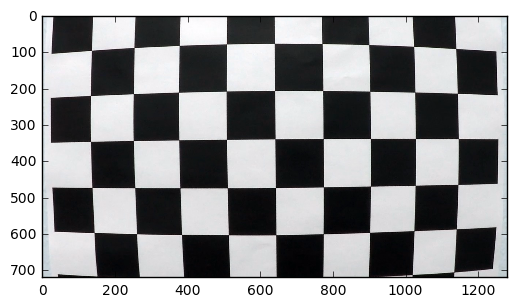

In [2]:
example_image = "./camera_cal/calibration1.jpg"
plt.imshow(cv2.imread(example_image))

## The undistorted example image

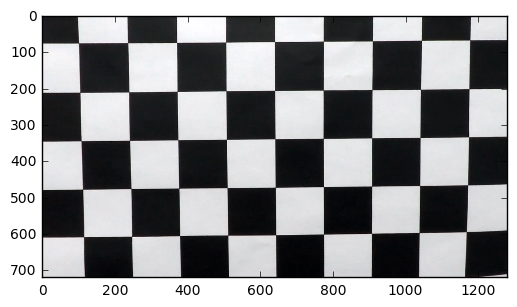

In [3]:
cimg = calibrate_and_undistort(example_image, 9, 5)
plt.imshow(cimg)

## Undistord and save all 20 images in camera_cal with shape 9,6

In [4]:
for i in range(1,21):
    fname = "./camera_cal/calibration"+str(i)+".jpg"
    dname = "./output_images/calibration"+str(i)+"_calibrated.jpg"
    cimg = calibrate_and_undistort(fname)
    if cimg is not None:
        plt.imsave(dname, cimg, cmap="gray")